In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

dimensions de X: (100, 2)
dimensions de y: (100, 1)


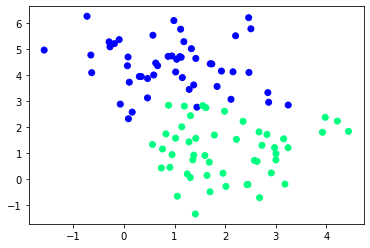

In [4]:
X,y = make_blobs(n_samples=100, n_features=2, centers=2 ,random_state=0)
y = y.reshape((y.shape[0],1))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:,0], X[:,1], c=y, cmap='winter')
plt.show()

In [5]:
def initialisation(X):
    W= np.random.randn(X.shape[1], 1)
    b= np.random.randn(1)
    return (W,b)

In [10]:
W, b = initialisation(X)

print('W------', W.shape)
print('b------', b.shape)

W------ (2, 1)
b------ (1,)


In [11]:
def model(X, W, b):
    Z= X.dot(W)+b
    A= 1/(1+np.exp(-Z))
    return A

In [13]:
A = model(X, W, b)

print(A.shape)

(100, 1)


In [14]:
def log_loss(A, y):
    return (1/len(y))*np.sum(-y * np.log(A)-(1-y)*np.log(1-A))

In [15]:
log_loss(A, y)

0.4226935704752869

In [16]:
def gradients(A, X, y):
    dW = (1/len(y))*np.dot(X.T, A-y)
    db = (1/len(y))*np.sum(A-y)
    return dW, db

In [17]:
dW, db = gradients(A, X, y)

In [20]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate*dW
    b = b - learning_rate*db
    return (W, b)

In [41]:
def predict(X, W, b):
    A = model(X, W, b)
    print(A)
    return A >=0.5

In [25]:
from sklearn.metrics import accuracy_score

In [28]:
def artificial_neuron(X, y, learning_rate=0.1, n_iterations=100):
    #initialiser W et b
    W, b = initialisation(X)
    
    Loss=[]
    
    for i in range(n_iterations):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
        
    y_pred = predict(X, W, b)  
    print(accuracy_score(y,y_pred))
        
    plt.plot(Loss)
    plt.show()
    
    return (W,b)
        

0.92


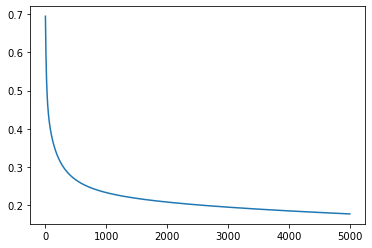

In [29]:
W,b= artificial_neuron(X,y, 0.01, 5000)

In [30]:
W

array([[ 1.31308185],
       [-1.57800439]])

In [31]:
b

array([1.9079189])

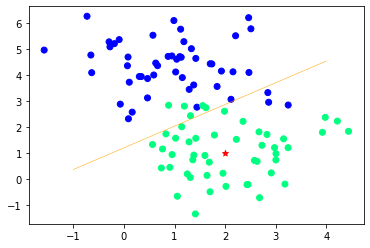

[0.95054998]


array([ True])

In [45]:
new_plant= np.array([2,1])

x0 = np.linspace(-1,4,100)
x1 = (-W[0] * x0 - b)/W[1]

plt.scatter(X[:,0], X[:,1], c=y, cmap='winter')
plt.scatter(new_plant[0], new_plant[1], c='red', marker='*')
plt.plot(x0,x1, c='orange', lw=0.5)
plt.show()
predict(new_plant, W,b)